<a href="https://colab.research.google.com/github/Looplover/summer-of-code-2023/blob/main/SOC23_week1ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("amazon_co-ecommerce_sample.csv")

In [ ]:
print(df)

      index                           uniq_id  \
0         0  eac7efa5dbd3d667f26eb3d3ab504464   
1         1  b17540ef7e86e461d37f3ae58b7b72ac   
2         2  348f344247b0c1a935b1223072ef9d8a   
3         3  e12b92dbb8eaee78b22965d2a9bbbd9f   
4         4  e33a9adeed5f36840ccc227db4682a36   
...     ...                               ...   
9995   9995  44d6967f083825a5de36ad4865a65bcd   
9996   9996  08f0747b6fc6687215ffb994c3a6fb32   
9997   9997  bf6cc073f8f24e6e338190fa16f6ee9d   
9998   9998  cd783d0b8b44e631b9788b203eaaefae   
9999   9999  94d18e86e504bee1e392df7e5738b18a   

                                           product_name  \
0                                 Hornby 2014 Catalogue   
1     FunkyBuys® Large Christmas Holiday Express Fes...   
2     CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...   
3        HORNBY Coach R4410A BR Hawksworth Corridor 3rd   
4     Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...   
...                                                 ...  

In [ ]:
pd.options.display.max_columns = 5

In [ ]:
print(df)

      index                           uniq_id  ...  \
0         0  eac7efa5dbd3d667f26eb3d3ab504464  ...   
1         1  b17540ef7e86e461d37f3ae58b7b72ac  ...   
2         2  348f344247b0c1a935b1223072ef9d8a  ...   
3         3  e12b92dbb8eaee78b22965d2a9bbbd9f  ...   
4         4  e33a9adeed5f36840ccc227db4682a36  ...   
...     ...                               ...  ...   
9995   9995  44d6967f083825a5de36ad4865a65bcd  ...   
9996   9996  08f0747b6fc6687215ffb994c3a6fb32  ...   
9997   9997  bf6cc073f8f24e6e338190fa16f6ee9d  ...   
9998   9998  cd783d0b8b44e631b9788b203eaaefae  ...   
9999   9999  94d18e86e504bee1e392df7e5738b18a  ...   

                                       customer_reviews  \
0     Worth Buying For The Pictures Alone (As Ever) ...   
1     Four Stars // 4.0 // 18 Dec. 2015 // By\n    \...   
2     **Highly Recommended!** // 5.0 // 26 May 2015 ...   
3     I love it // 5.0 // 22 July 2013 // By\n    \n...   
4     Birthday present // 5.0 // 14 April 2014 // By... 

In [ ]:
print(df.columns)

Index(['index', 'uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers'],
      dtype='object')


In [ ]:
ser = df[['product_name','price','sellers','manufacturer','average_review_rating','number_of_reviews']]

In [ ]:
ser.dropna(inplace=True)

<ipython-input-39-af7cab5a0f88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ser.dropna(inplace=True)


In [ ]:
ser2 = df['product_name']

In [ ]:
ser.head()

,product_name,price,...,average_review_rating,number_of_reviews
0,Hornby 2014 Catalogue,£3.42,...,4.9 out of 5 stars,15
1,FunkyBuys® Large Christmas Holiday Express Fes...,£16.99,...,4.5 out of 5 stars,2
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,£9.99,...,3.9 out of 5 stars,17
5,20pcs Model Garden Light Double Heads Lamppost...,£6.99,...,5.0 out of 5 stars,2
6,Hornby 00 Gauge 230mm BR Bogie Passenger Brake...,£24.99,...,4.5 out of 5 stars,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = ser.copy()
Y = ser["price"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.33)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg = DecisionTreeRegressor()


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc = OrdinalEncoder(handle_unknown = 'error')

In [ ]:
enc.fit(X_train)

OrdinalEncoder()

In [ ]:
X_newtrain = enc.transform(X_train)

In [ ]:
X_newtest = enc.fit_transform(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y_entrain = LE.fit_transform(Y_train)

In [ ]:
reg.fit(X_newtrain,Y_entrain)

DecisionTreeRegressor()

In [ ]:
Y_entest = pd.Series(LE.fit_transform(Y_test))

In [ ]:
type(Y_entest)

pandas.core.series.Series

In [ ]:
result_df = reg.predict(X_newtest)

In [ ]:
result_df

array([808., 510., 844., ..., 844., 429., 325.])

In [ ]:
Y_entest.sub(result_df).pow(2).mean()

0.6441779110444777

[Text(0.4961565698099415, 0.9615384615384616, 'x[1] <= 808.5\nsquared_error = 246608.112\nsamples = 4060\nvalue = 796.209'),
 Text(0.24081688596491227, 0.8846153846153846, 'x[1] <= 388.5\nsquared_error = 56714.512\nsamples = 2087\nvalue = 374.058'),
 Text(0.11412360654239766, 0.8076923076923077, 'x[1] <= 179.5\nsquared_error = 13244.131\nsamples = 1115\nvalue = 178.867'),
 Text(0.051146747076023395, 0.7307692307692307, 'x[1] <= 79.5\nsquared_error = 2203.101\nsamples = 563\nvalue = 78.741'),
 Text(0.025185032894736843, 0.6538461538461539, 'x[1] <= 40.5\nsquared_error = 517.369\nsamples = 288\nvalue = 40.642'),
 Text(0.013454861111111112, 0.5769230769230769, 'x[1] <= 20.5\nsquared_error = 100.885\nsamples = 143\nvalue = 20.196'),
 Text(0.007538377192982456, 0.5, 'x[1] <= 11.5\nsquared_error = 15.112\nsamples = 74\nvalue = 11.554'),
 Text(0.0044773391812865495, 0.4230769230769231, 'x[1] <= 6.5\nsquared_error = 9.042\nsamples = 34\nvalue = 8.324'),
 Text(0.0027412280701754384, 0.346153846

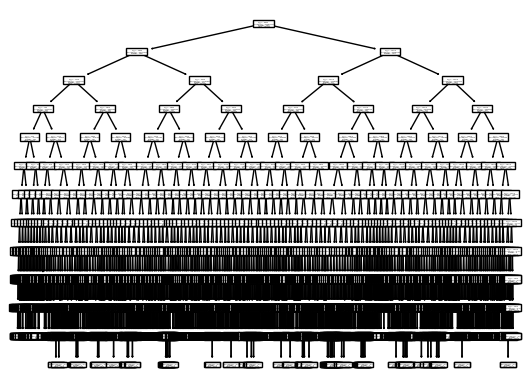

In [ ]:
from sklearn.tree import plot_tree
plot_tree(reg)